# Repaso (Módulo 3)
> El tema principal en este módulo fueron simulaciones Montecarlo. Al finalizar este módulo, se espera que ustedes tengan las siguientes competencias
> - Evaluar integrales (o encontrar áreas) numéricamente mendiante métodos Montecarlo.
> - Poder replicar fractales aleatorios símples (como los de Barnsley), dadas las características del mismo.
> - Realizar evaluaciones de probabilidad precio-umbral.

## Ejemplo 1. Evaluación numérica de integrales utilizando Montecarlo

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

En clase desarrollamos funciones para la evaluación de integrales con ambos métodos (explicar porqué la segunda se puede ver como una integral). Las funciones son las siguientes:

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import random

In [2]:
def int_montecarlo1(f, a, b, N):
    # Evaluación numérica de integrales por Montecarlo tipo 1
    # f=f(x) es la función a integrar (debe ser declarada previamente) que devuelve para cada x su valor imagen,
    # a y b son los límites inferior y superior del intervalo donde se integrará la función, y N es el número
    # de puntos con que se aproximará.
    return (b-a)*np.mean(f(np.random.uniform(a, b, N)))

In [27]:
def int_montecarlo2(region, a1, b1, a2, b2, N):
    # Evaluación numérica de integrales por Montecarlo tipo 2
    # region=region(x,y) retorna True si la coordenada (x,y) pertenece a la región a integrar y False de lo 
    # contrario , a1, b1, a2, b2 son los límites del rectángulo que contiene la región, y N es el número de 
    # puntos con que se aproximará.
    A_R = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    return A_R*np.mean(region(x,y))

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, $f_4(x)=e^{e^{x}}$, y $f_5(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar las funciones anteriores para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

Hacer una tabla por cada método.

¿Se pueden ver diferencias notables en la velocidad de convergencia de los métodos?

### Solución

In [4]:
def f1(x):
    return np.sqrt(1+x**4)

def f2(x):
    return np.log(np.log(x))

def f3(x):
    return 1/np.log(x)

def f4(x):
    return np.exp(np.exp(x))

def f5(x):
    return np.exp(-x**2/2)

In [31]:
a, b = 4, 5
N = [10, 100, 1000, 10000, 100000]
#N = np.logspace(1, 5, 5)

In [32]:
tabla1 = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'f5'], index=N)
tabla1.index.name = 'Cant_terminos'

In [33]:
# Montecarlo tipo 1
for n in N:
    tabla1.loc[n,'f1'] = int_montecarlo1(f1, a, b, n)
    tabla1.loc[n,'f2'] = int_montecarlo1(f2, a, b, n)
    tabla1.loc[n,'f3'] = int_montecarlo1(f3, a, b, n)
    tabla1.loc[n,'f4'] = int_montecarlo1(f4, a, b, n)
    tabla1.loc[n,'f5'] = int_montecarlo1(f5, a, b, n)
    
tabla1

,f1,f2,f3,f4,f5
Cant_terminos,,,,,
10,21.7981,0.402468,0.670178,4.1211e+60,4.56412e-05
100,20.3604,0.410418,0.667517,5.08431e+62,7.58739e-05
1000,20.3299,0.404968,0.667564,2.04831e+62,8.31873e-05
10000,20.3631,0.405556,0.667094,1.70607e+62,7.76196e-05
100000,20.3505,0.4056,0.667005,1.97501e+62,7.85433e-05


In [18]:
def region1(x,y):
    return y<=f1(x)

def region2(x,y):
    return y<=f2(x)

def region3(x,y):
    return y<=f3(x)

def region4(x,y):
    return y<=f4(x)

def region5(x,y):
    return y<=f5(x)

In [28]:
a1, b1 = 4, 5
a2 = 0

tabla2 = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'f5'], index=N)
tabla2.index.name = 'Cant_terminos'
# Montecarlo tipo 2
for n in N:
    tabla2.loc[n,'f1'] = int_montecarlo2(region1, a1, b1, a2, 26, n)
    tabla2.loc[n,'f2'] = int_montecarlo2(region2, a1, b1, a2, 0.5, n)
    tabla2.loc[n,'f3'] = int_montecarlo2(region3, a1, b1, a2, 0.73, n)
    tabla2.loc[n,'f4'] = int_montecarlo2(region4, a1, b1, a2, 3e64, n)
    tabla2.loc[n,'f5'] = int_montecarlo2(region5, a1, b1, a2, 0.00035, n)
    
tabla2

,f1,f2,f3,f4,f5
Cant_terminos,,,,,
10,18.2,0.35,0.657,0,7e-05
100,21.84,0.395,0.6643,3e+62,5.6e-05
1000,20.41,0.4015,0.67744,1.2e+62,8.33e-05
10000,20.3138,0.40655,0.665687,1.89e+62,7.952e-05
100000,20.4248,0.406745,0.667125,1.998e+62,7.80115e-05


In [34]:
tabla1

,f1,f2,f3,f4,f5
Cant_terminos,,,,,
10,21.7981,0.402468,0.670178,4.1211e+60,4.56412e-05
100,20.3604,0.410418,0.667517,5.08431e+62,7.58739e-05
1000,20.3299,0.404968,0.667564,2.04831e+62,8.31873e-05
10000,20.3631,0.405556,0.667094,1.70607e+62,7.76196e-05
100000,20.3505,0.4056,0.667005,1.97501e+62,7.85433e-05


## Ejemplo 2. Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico (¿Qué es esto?).

Como en la clase de fractales, repliquemos el fractal tipo Barnsley descrito por la siguiente tabla...

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

In [35]:
import pandas as pd
import numpy as np

In [37]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


### Solución

In [39]:
mat_Barnsley = df.as_matrix()
mat_Barnsley

array([[  0.5,   0. ,   0. ,   0.5,   1. ,   1. ,   0.1],
       [  0.5,   0. ,   0. ,   0.5,  50. ,   1. ,   0.2],
       [  0.5,   0. ,   0. ,   0.5,   1. ,  50. ,   0.3],
       [  0.5,   0. ,   0. ,   0.5,  50. ,  50. ,   0.4]])

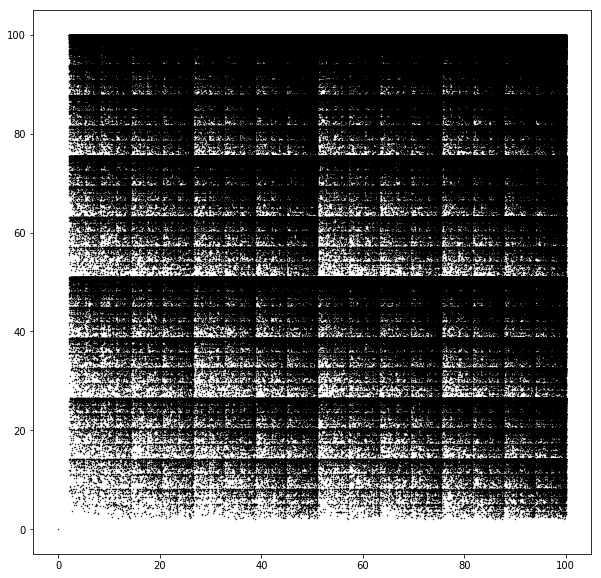

In [40]:
# Punto inicial
x, y = [0.0], [0.0]
# Generación de puntos con las frecuencias dadas
for k in range(1000000):
    p = random.random()
    if p <= mat_Barnsley[0, 6]:
        i = 0
    elif p <= mat_Barnsley[0, 6] + mat_Barnsley[1,6]:
        i = 1
    elif p <= mat_Barnsley[0, 6] + mat_Barnsley[1,6] + mat_Barnsley[2, 6]:
        i = 2
    else:
        i = 3
    
    x.append(mat_Barnsley[i, 0]*x[-1] + mat_Barnsley[i, 1]*y[-1] + mat_Barnsley[i, 4])
    y.append(mat_Barnsley[i, 2]*x[-2] + mat_Barnsley[i, 3]*y[-1] + mat_Barnsley[i, 5])

plt.figure(figsize=(10,10))
plt.scatter(x, y, c='k', s = 0.2)
plt.show()

## Ejemplo 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2017 para ver si el análisis concuerda.

Descarguemos datos para Apple y Microsoft en el 2016

In [41]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

ModuleNotFoundError: No module named 'pandas_datareader'

In [45]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    #closes = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date).read()
    #closes.set_axis(closes.loc['date',:,ticker[0]].values, axis=1, inplace=True)
    #closes = closes.loc['adjclose'].sort_index().dropna()
    #closes = pd.DataFrame(np.array(closes.as_matrix(), dtype=np.float64), columns=ticker, index=closes.index)
    #closes.index.name = 'Date'
    closes = pd.DataFrame(closes.loc[:, 'Adj Close'])
    closes.columns = [ticker]
    return closes
    #return closes

In [43]:
closes_AAPL = get_historical_closes('AAPL', '2016-01-01', '2016-12-31')
closes_MSFT = get_historical_closes('MSFT', '2016-01-01', '2016-12-31')
closes = closes_AAPL.join(closes_MSFT)

NameError: name 'web' is not defined

In [44]:
closes.plot(figsize=(8,6));

NameError: name 'closes' is not defined

Calculamos los rendimientos diarios junto con sus características estadísticas

In [49]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [50]:
daily_ret = calc_daily_ret(closes)

NameError: name 'closes' is not defined

In [47]:
mean = daily_ret.mean()
std = daily_ret.std()

NameError: name 'daily_ret' is not defined

In [48]:
mean_AAPL, mean_MSFT = mean.AAPL, mean.MSFT
std_AAPL, std_MSFT = std.AAPL, std.MSFT

mean_AAPL, std_AAPL, mean_MSFT, std_MSFT

NameError: name 'mean' is not defined

Simulamos 10000 escenarios de rendimientos diarios para el 2017 (para cada una de las empresas)

In [59]:
ndays = 360
nscen = 10000
dates = pd.date_range(start='2017-01-01', periods=ndays)
sim_ret_AAPL = pd.DataFrame(np.random.normal(loc=mean_AAPL, scale=std_AAPL, size=(ndays, nscen)), index = dates)
sim_ret_MSFT = pd.DataFrame(np.random.normal(loc=mean_MSFT, scale=std_MSFT, size=(ndays, nscen)), index = dates)

NameError: name 'mean_AAPL' is not defined

Calculamos los precios con base en los rendimientos simulados

In [57]:
sim_data_AAPL = closes.iloc[-1,0]*np.exp(sim_ret_AAPL.cumsum())
sim_data_MSFT = closes.iloc[-1,1]*np.exp(sim_ret_MSFT.cumsum())

NameError: name 'closes' is not defined

Calculamos las probabilidades con base en una tasa de interés anual deseada

In [58]:
i = 0.1
K_AAPL = (1+i)*closes.iloc[-1,0]
strike_AAPL = pd.DataFrame(K_APPL*np.ones((ndays,nscen)),index=dates)
count = sim_data_AAPL>strike_AAPL
prob = count.T.sum()/ntraj
prob.plot(figsize=(8,6),legend=False);

NameError: name 'closes' is not defined

Finalmente, veamos los datos reales del 2017 para ver que tan acertados fueron nuestros análisis...

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>